In [1]:
import perceval as pv 
from perceval.components import BS, PS
from perceval.rendering.circuit import SymbSkin, PhysSkin
import perceval.components.unitary_components as comp
from perceval.utils import BasicState, DensityMatrix
import numpy as np
from circuits import addPrep, deAddPrep, fullCircuit
from utils import get_state_vector, run_circuit, loss_function, getFidelityRho1, getFidelityRho2, getFidelityRho
from collections import Counter
from scipy.optimize import minimize

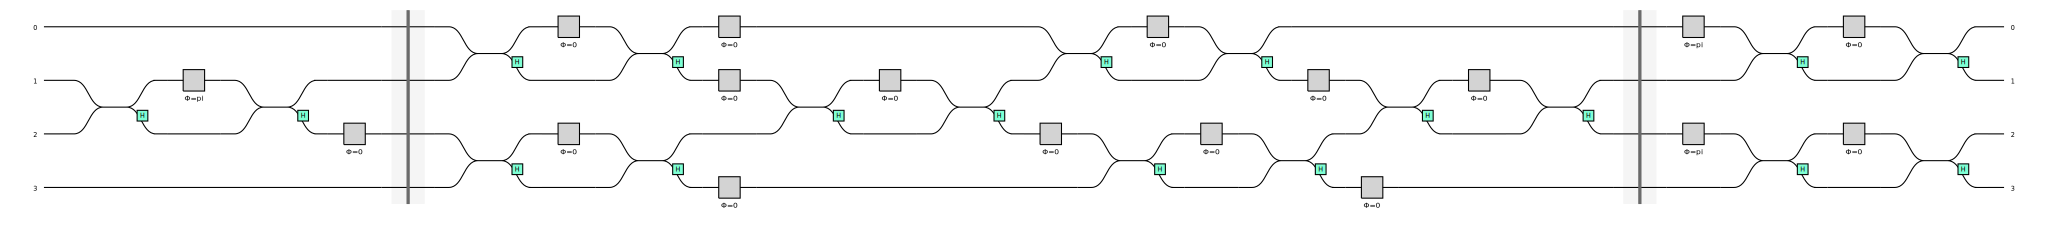

In [2]:
theta = np.pi
phi = 0
full_qc = fullCircuit([0]*12, theta, phi)
pv.pdisplay(full_qc, skin=SymbSkin())

In [4]:
sol = minimize(loss_function, method= 'Nelder-Mead', x0=np.random.rand(1,12)[0]*2*np.pi, options={"maxiter":200})

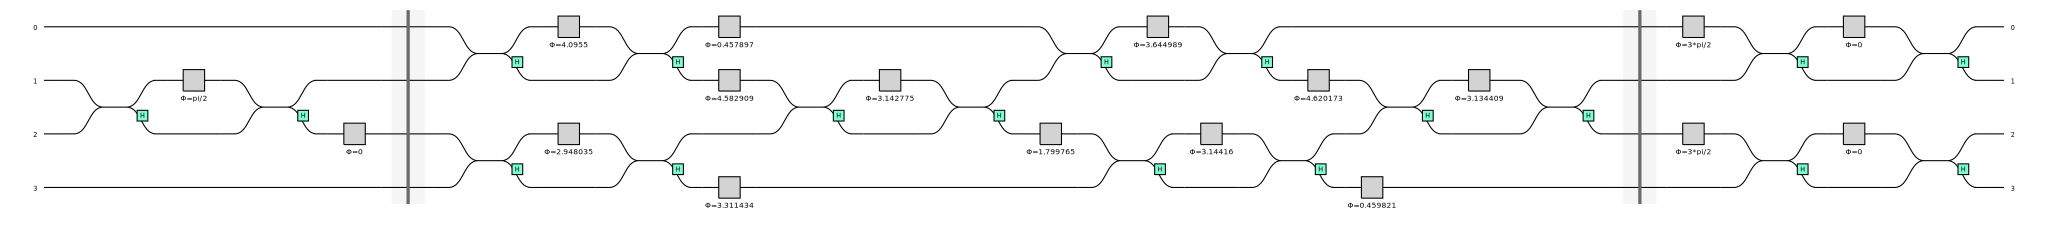

In [5]:
optimized_qc = fullCircuit(sol.x, np.pi/2, 0)
pv.pdisplay(optimized_qc, skin=SymbSkin())


In [7]:
print(sol)
counts = run_circuit(pv.StateVector([1,0,1,0]), optimized_qc)

getFidelityRho1(counts)

       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 2.7752443
             x: [ 4.096e+00  2.948e+00  4.583e+00  3.311e+00  3.143e+00
                  4.579e-01  1.800e+00  3.645e+00  3.144e+00  4.620e+00
                  4.598e-01  3.134e+00]
           nit: 200
          nfev: 340
 final_simplex: (array([[ 4.096e+00,  2.948e+00, ...,  4.598e-01,
                         3.134e+00],
                       [ 4.095e+00,  2.948e+00, ...,  4.598e-01,
                         3.135e+00],
                       ...,
                       [ 4.095e+00,  2.948e+00, ...,  4.597e-01,
                         3.135e+00],
                       [ 4.094e+00,  2.948e+00, ...,  4.598e-01,
                         3.133e+00]]), array([ 2.775e+00,  2.783e+00, ...,  2.797e+00,  2.797e+00]))


0.0168

In [8]:
get_state_vector(pv.StateVector([1,0,1,0]), optimized_qc)

(0.036+0.047I)*|1,0,0,1>+(0.115-0.023I)*|1,0,1,0>+(-0.289-0.116I)*|0,1,1,0>+(0.199-0.592I)*|0,1,0,1>+(0.391-0.114I)*|0,0,0,2>-0.003*|0,2,0,0>+(0.084+0.403I)*|0,0,1,1>+(0.388-0.062I)*|0,0,2,0>+(-0.072-0.037I)*|1,1,0,0>+(0.016-0.005I)*|2,0,0,0>